In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import missingno as mano
%matplotlib inline

In [ ]:
import pandas as pd

# Read the CSV file
bnbdf = pd.read_csv("telecom_customer_churn.csv")

# Print the DataFrame
print(bnbdf)
print(bnbdf)

     Customer ID  Gender  Age Married  Number of Dependents  \
0     0002-ORFBO  Female   37     Yes                     0   
1     0003-MKNFE    Male   46      No                     0   
2     0004-TLHLJ    Male   50      No                     0   
3     0011-IGKFF    Male   78     Yes                     0   
4     0013-EXCHZ  Female   75     Yes                     0   
...          ...     ...  ...     ...                   ...   
5136  7233-IOQNP  Female   34     Yes                     0   
5137  7233-PAHHL    Male   57     Yes                     0   
5138  7234-FECYN  Female   78      No                     0   
5139  7234-KMNRQ    Male   21      No                     0   
5140  7235-NXZCP    Male   79      No                     0   

                   City  Zip Code   Latitude   Longitude  Number of Referrals  \
0          Frazier Park   93225.0  34.827662 -118.999073                  2.0   
1              Glendale   91206.0  34.162515 -118.203869                  0.0   


In [ ]:
duplicate_count = bnbdf.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)
airbnbdf = bnbdf.drop_duplicates() ## remove duplicates / unncessary rows

Number of duplicate rows: 0


In [ ]:
airbnbdf.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                1
Latitude                                1
Longitude                               1
Number of Referrals                     1
Tenure in Months                        1
Offer                                2840
Phone Service                           1
Avg Monthly Long Distance Charges     491
Multiple Lines                        491
Internet Service                        1
Internet Type                        1112
Avg Monthly GB Download              1112
Online Security                      1112
Online Backup                        1112
Device Protection Plan               1112
Premium Tech Support                 1112
Streaming TV                         1112
Streaming Movies                  

<Axes: >

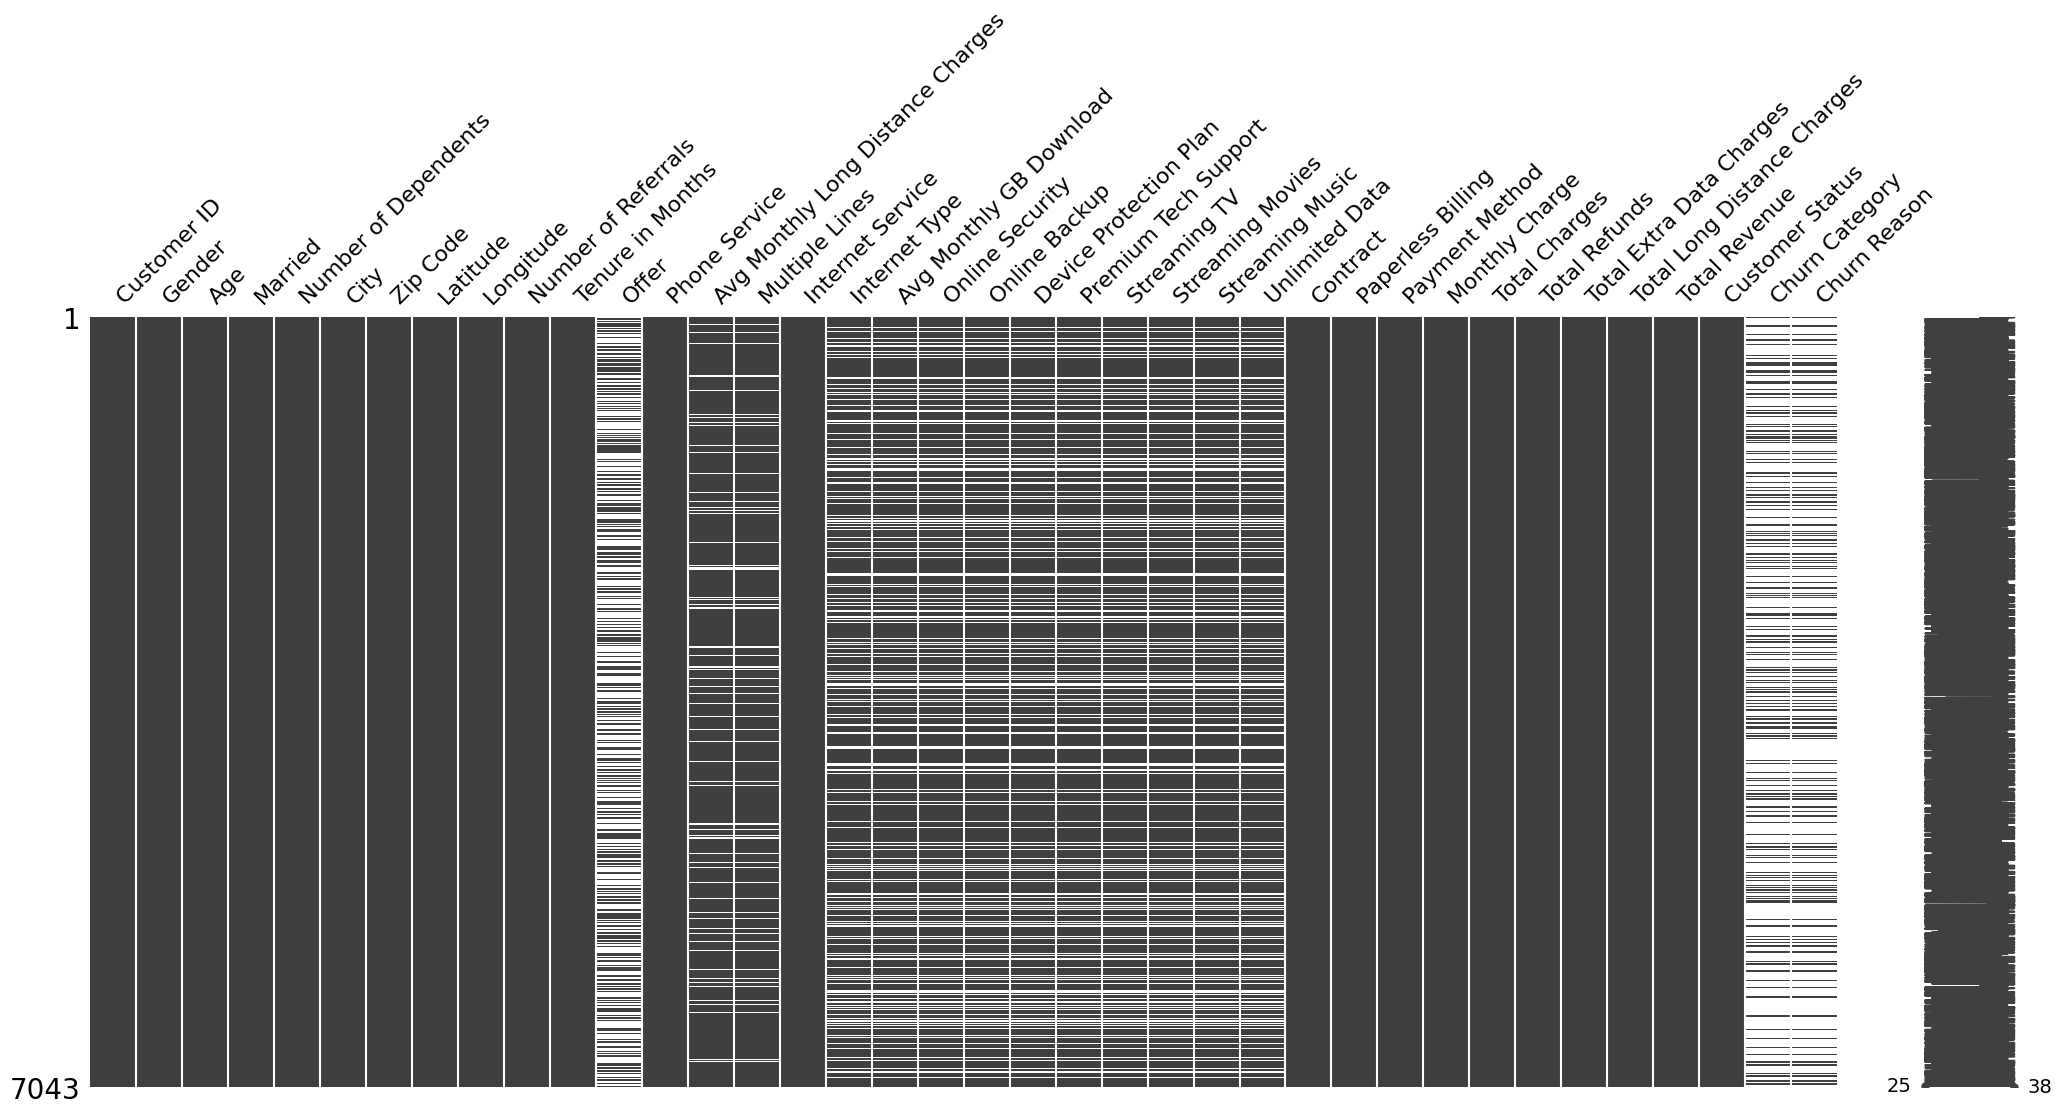

In [ ]:
mano.matrix(airbnbdf)


<Axes: >

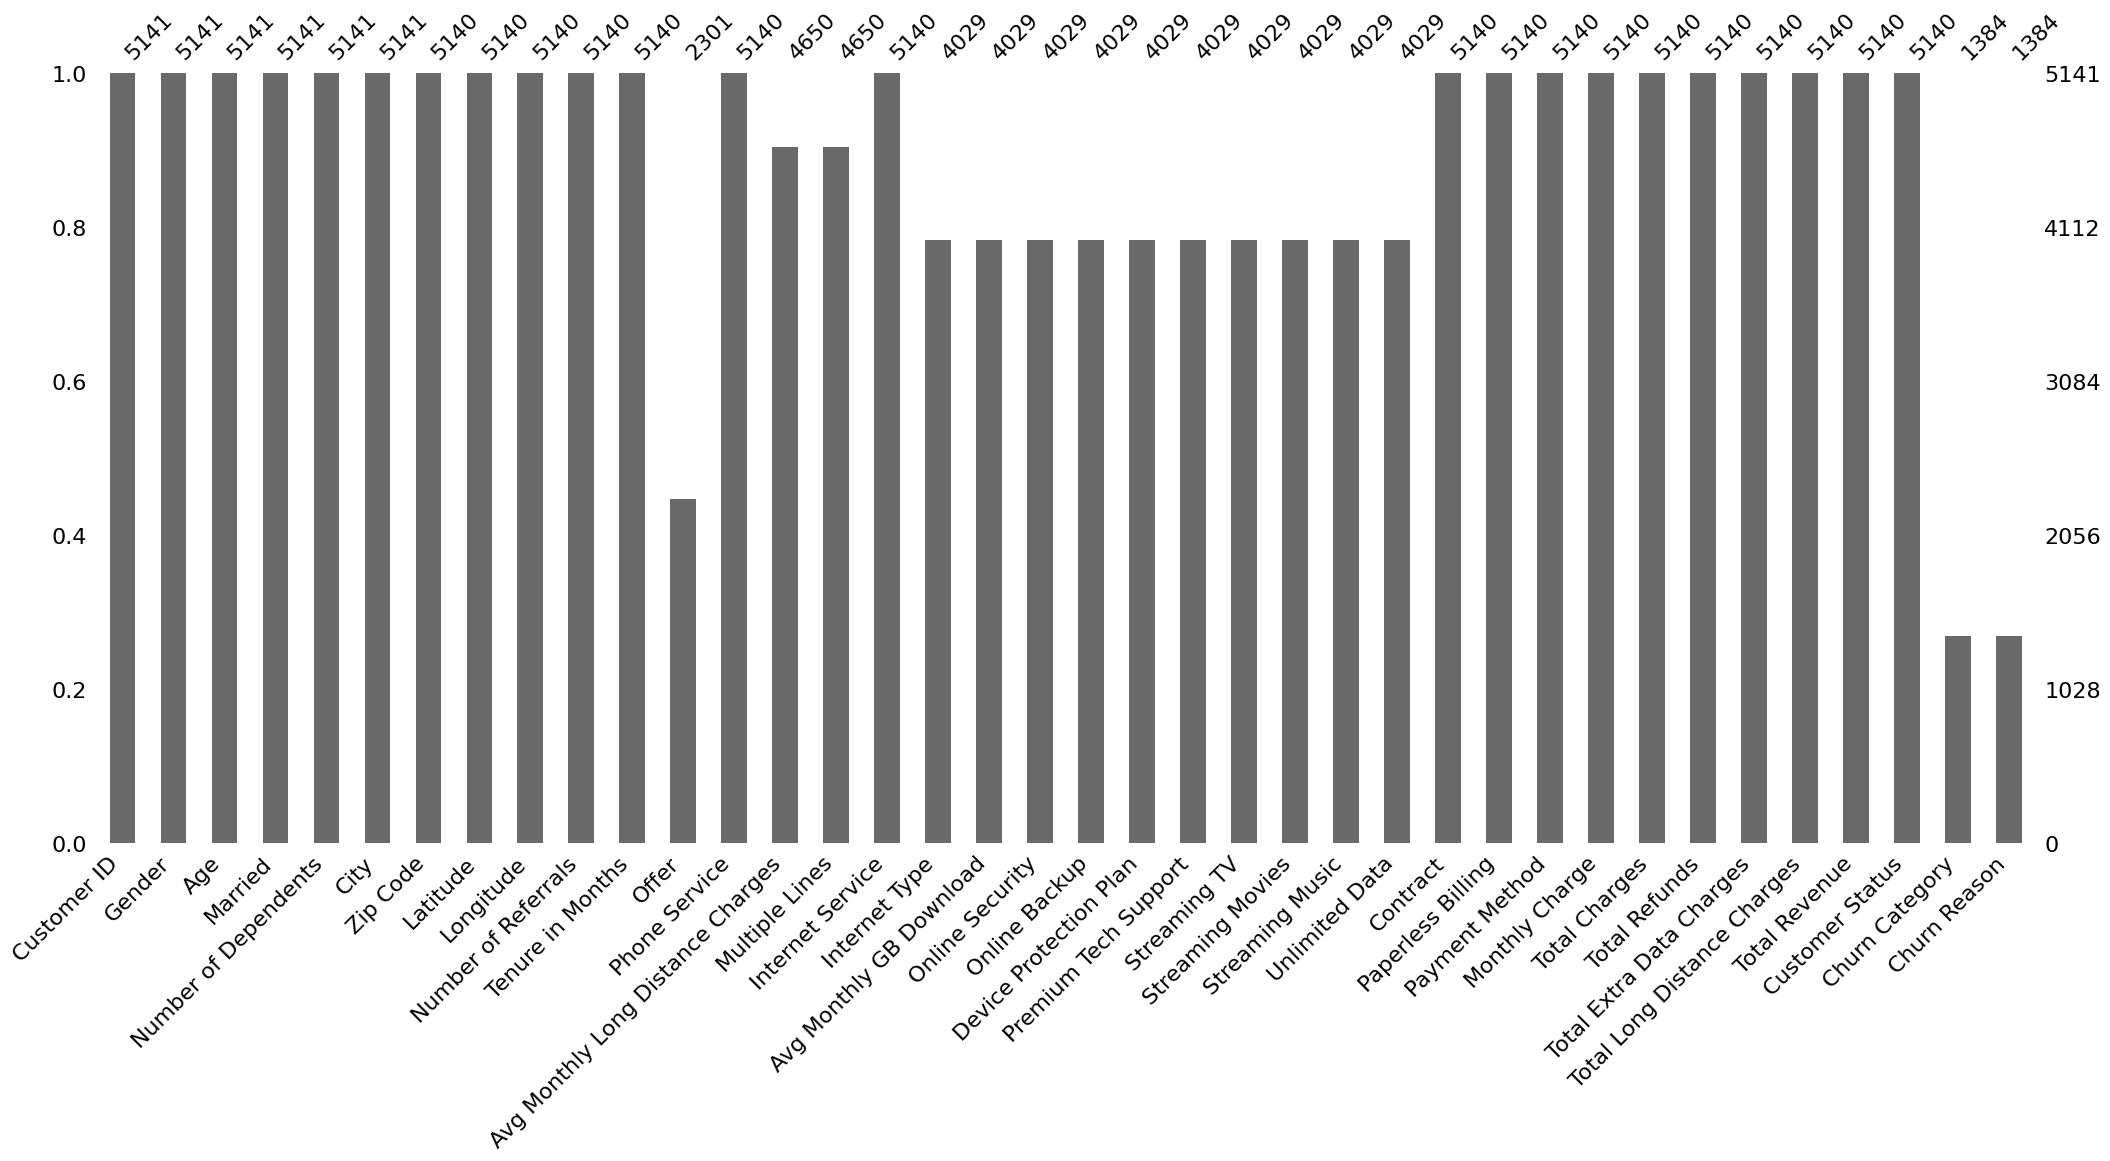

In [ ]:
mano.bar(airbnbdf)

The columns Churn Reason and Churn Category have a significant number of missing values. This is because approximately 73% of customers  stayed or joined and did not churn,  therefore, there was no need for a churn reason or category.

There are 2 services provided : Internet and Phone.

So some customers might not avail both services, this is why there are missing values in the columns.

**For Internet Services**

We will fill 0 gbs for customers with no internet services.

In [ ]:
airbnbdf.loc[airbnbdf['Internet Service'] == 'No', 'Avg Monthly GB Download'] = airbnbdf.loc[airbnbdf['Internet Service'] == 'No', 'Avg Monthly GB Download'].fillna(0.0)

Consequently, customers without internet service won't have some other similar services as well.

In [ ]:
net_dependent_features = ['Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data']

airbnbdf.loc[airbnbdf['Internet Service'] == 'No', net_dependent_features] = airbnbdf.loc[airbnbdf['Internet Service'] == 'No', net_dependent_features].fillna('No internet service')

**For Phone Services**

We'll fill 0 charges for customers with no phone services

In [ ]:
airbnbdf.loc[airbnbdf['Phone Service'] == 'No',
             'Avg Monthly Long Distance Charges']= airbnbdf.loc[airbnbdf['Phone Service'] == 'No', 'Avg Monthly Long Distance Charges'].fillna(0.0)

They also can't have multiple lines

In [ ]:
airbnbdf.loc[airbnbdf['Phone Service'] == 'No', 'Multiple Lines'] = airbnbdf.loc[airbnbdf['Phone Service'] == 'No', 'Multiple Lines'].fillna('No phone service')

For the customers who didn't avail any offer

In [ ]:
airbnbdf['Offer'] = airbnbdf['Offer'].fillna('No Offer')
print(airbnbdf['Offer'].value_counts())

Offer
No Offer    2840
Offer B      599
Offer E      583
Offer D      435
Offer A      378
Offer C      306
Name: count, dtype: int64


<Axes: >

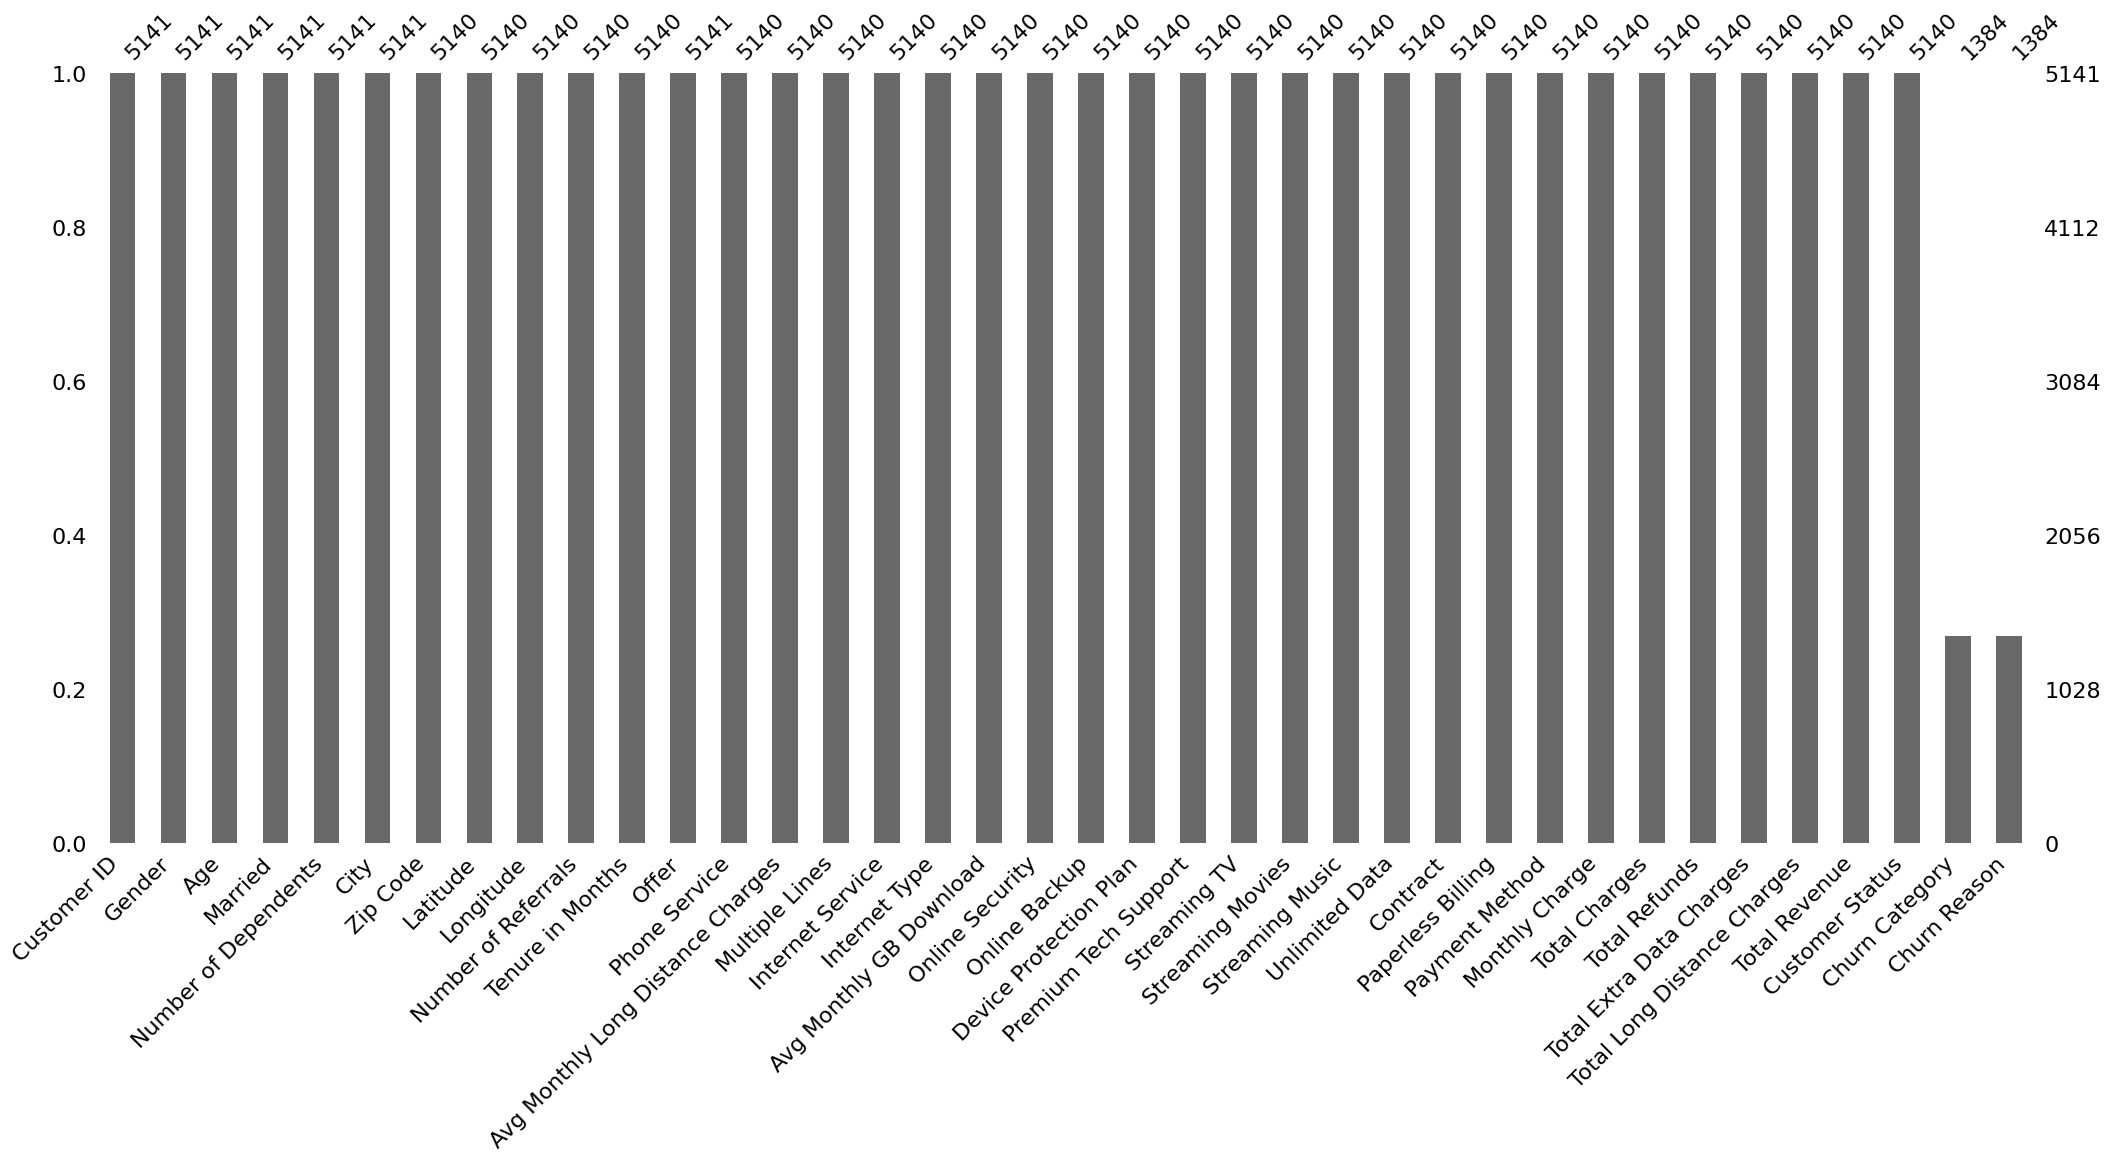

In [ ]:
mano.bar(airbnbdf)

We discovered that the first few columns had 5141 values and the rest had 5140.
This meant that there was one customer who had filled in only and few columns and the rest were emtpy, Hence we decided to delete that row. This is the row:

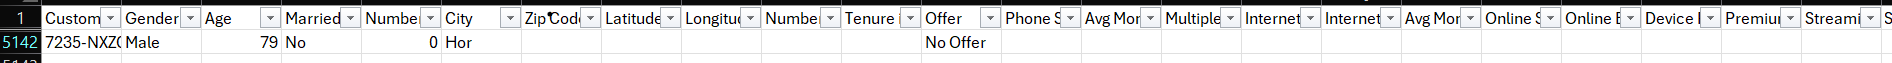

In [ ]:
last_row = airbnbdf.loc[len(airbnbdf) - 1]
print(last_row)

Customer ID                          7235-NXZCP
Gender                                     Male
Age                                          79
Married                                      No
Number of Dependents                          0
City                                        Hor
Zip Code                                    NaN
Latitude                                    NaN
Longitude                                   NaN
Number of Referrals                         NaN
Tenure in Months                            NaN
Offer                                  No Offer
Phone Service                               NaN
Avg Monthly Long Distance Charges           NaN
Multiple Lines                              NaN
Internet Service                            NaN
Internet Type                               NaN
Avg Monthly GB Download                     NaN
Online Security                             NaN
Online Backup                               NaN
Device Protection Plan                  

This is the same row that was in the screenshot above. We will delete this row

In [ ]:
# Using the iloc attribute
last_row_df = airbnbdf.iloc[-1:]
airbnbdf = airbnbdf.drop(last_row_df.index)

<Axes: >

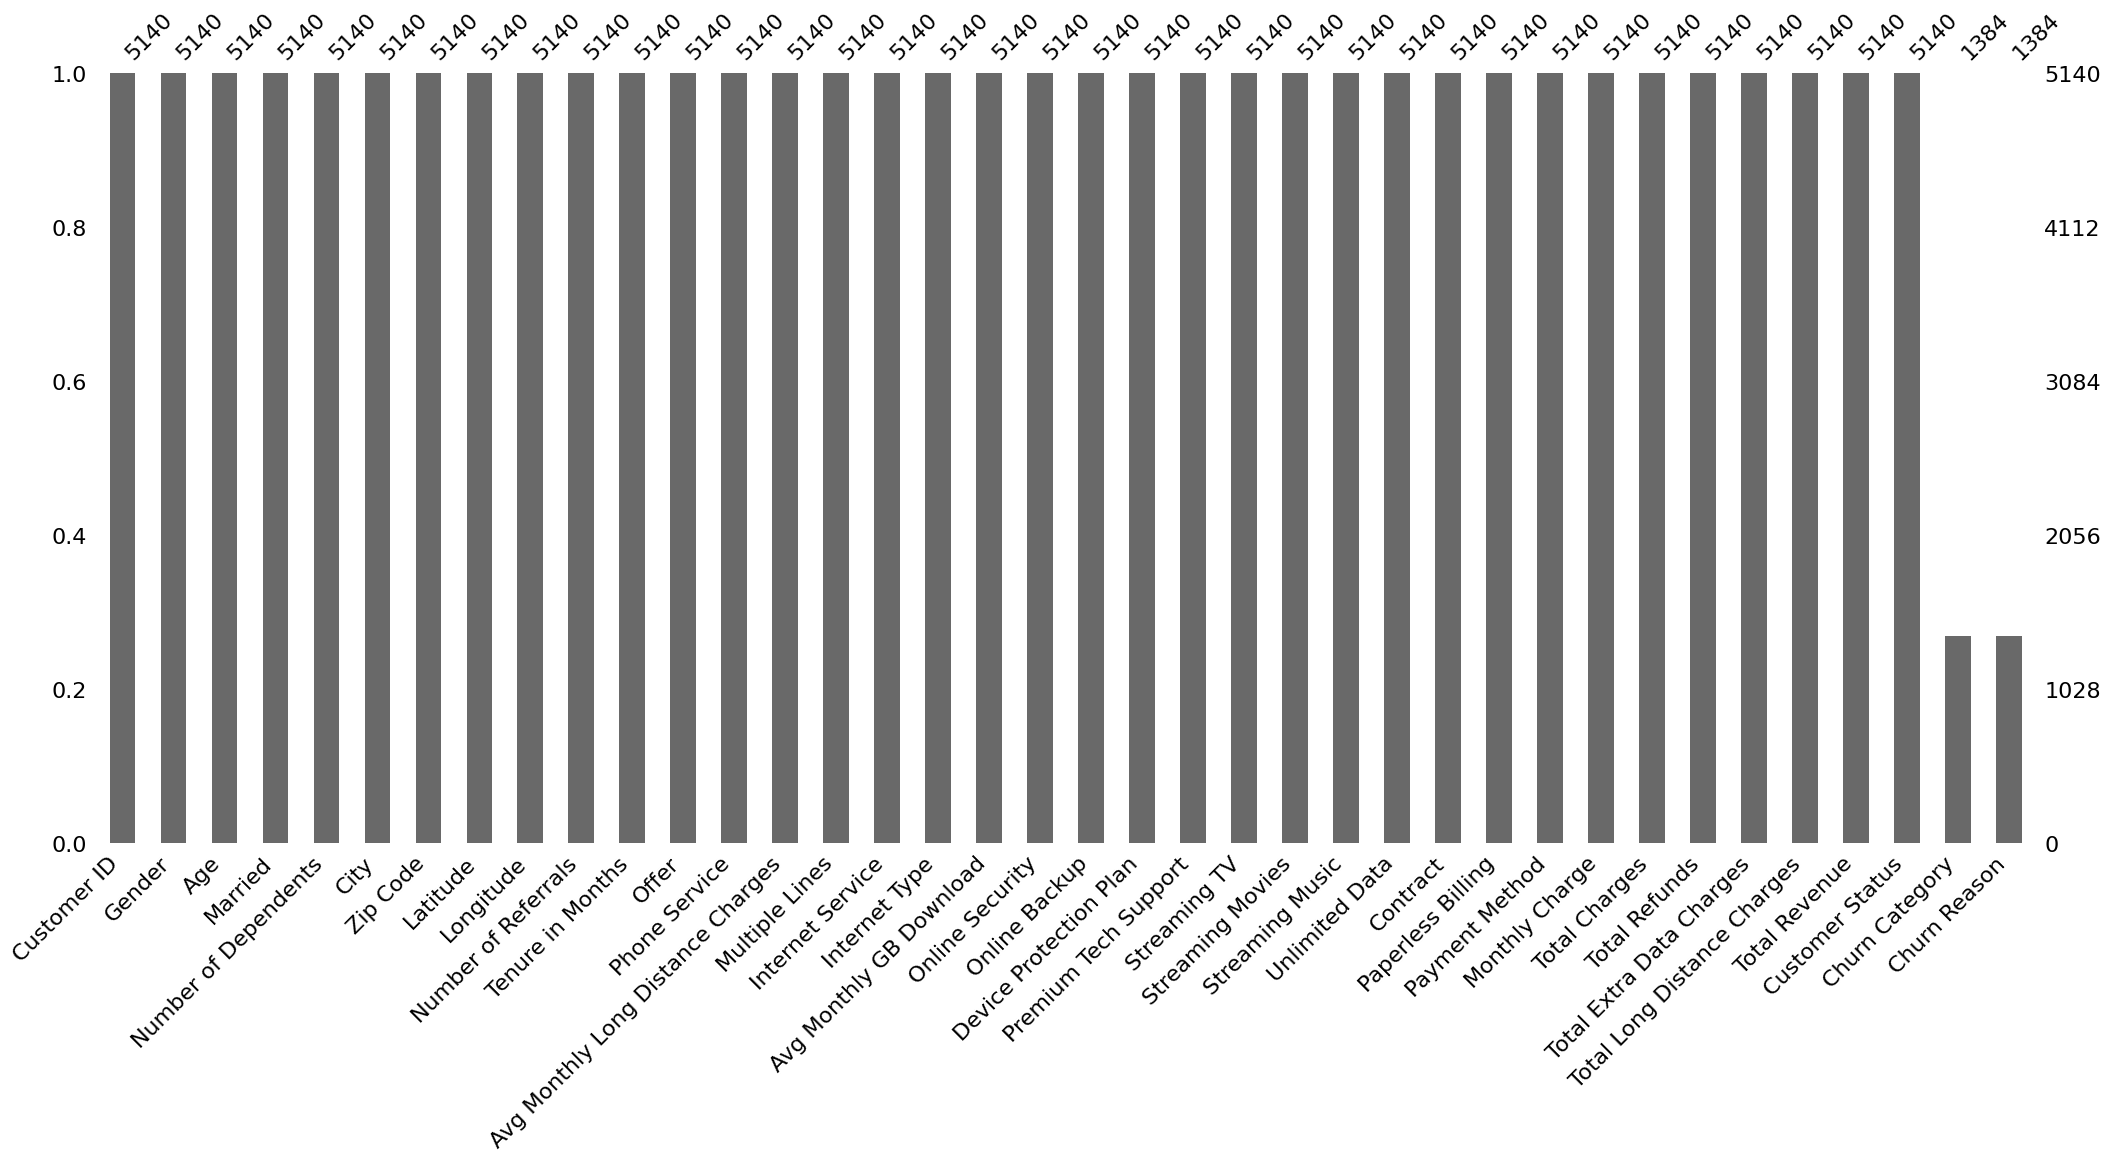

In [ ]:
mano.bar (airbnbdf)

In [ ]:
airbnbdf.to_csv('/content/updated_dataset.csv', index=False)

In [ ]:
from google.colab import files
files.download("/content/updated_dataset.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
internet_service_counts = airbnbdf['Internet Service'].value_counts()
print(internet_service_counts['Yes'])


4029


In [ ]:
internet_service_counts = airbnbdf['Phone Service'].value_counts()
print(internet_service_counts['Yes'])


4650


In [ ]:
import pandas as pd

# Read the CSV file
bnbdf1= pd.read_csv("telecom_zipcode_population.csv")

# Print the DataFrame
print(bnbdf1)
print(bnbdf1)

      Zip Code  Population
0        90001       54492
1        90002       44586
2        90003       58198
3        90004       67852
4        90005       43019
...        ...         ...
1666     96145        4002
1667     96146         942
1668     96148         678
1669     96150       33038
1670     96161       15783

[1671 rows x 2 columns]
      Zip Code  Population
0        90001       54492
1        90002       44586
2        90003       58198
3        90004       67852
4        90005       43019
...        ...         ...
1666     96145        4002
1667     96146         942
1668     96148         678
1669     96150       33038
1670     96161       15783

[1671 rows x 2 columns]


In [ ]:
duplicate_count = bnbdf1.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)
airbnbdf1 = bnbdf1.drop_duplicates() ## remove duplicates / unncessary rows

Number of duplicate rows: 0


In [ ]:
airbnbdf1.isnull().sum()

Zip Code      0
Population    0
dtype: int64

Using the sort and filter feature on excel, we found no inconsistent values.